In [3]:
!pip install sorting

  Created wheel for sorting: filename=sorting-1.0.3-py3-none-any.whl size=5882 sha256=3252f6b4a00004518921de6f76c9eee826f5f138c7fe70d0d2f10b597f652871
  Stored in directory: /root/.cache/pip/wheels/83/3f/9f/b841e376d9c6cf1c1a7ecb127d7d504a196d0247876037f5bd
Successfully built sorting


In [16]:
import time
import numpy as np
import math
import sorting
from matplotlib import pyplot as plt
from google.colab import files
import sorting
from tqdm import tqdm
from timeit import default_timer as timer
from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 22})

In [17]:
#sorting algorythms

def bubblesort(v):
    for i in range(len(v)-1):
        for j in range(0, len(v)-i-1):
            if v[j] > v[j + 1]:
                v[j], v[j + 1] = v[j + 1], v[j]
    return v


def quicksort(v):
    return sorting.quick(v)

#tim sort
MIN_MERGE = 32
 
def calcMinRun(n):

    r = 0
    while n >= MIN_MERGE:
        r |= n & 1
        n >>= 1
    return n + r
 
def insertionSort(arr, left, right):
    for i in range(left + 1, right + 1):
        j = i
        while j > left and arr[j] < arr[j - 1]:
            arr[j], arr[j - 1] = arr[j - 1], arr[j]
            j -= 1
 
 
def merge(arr, l, m, r):
     
    len1, len2 = m - l + 1, r - m
    left, right = [], []
    for i in range(0, len1):
        left.append(arr[l + i])
    for i in range(0, len2):
        right.append(arr[m + 1 + i])
 
    i, j, k = 0, 0, l
     

    while i < len1 and j < len2:
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
 
        else:
            arr[k] = right[j]
            j += 1
 
        k += 1
 

    while i < len1:
        arr[k] = left[i]
        k += 1
        i += 1
 

    while j < len2:
        arr[k] = right[j]
        k += 1
        j += 1
 
 
def timsort(arr):
    n = len(arr)
    minRun = calcMinRun(n)
     
    for start in range(0, n, minRun):
        end = min(start + minRun - 1, n - 1)
        insertionSort(arr, start, end)
 
    size = minRun
    while size < n:
         
        for left in range(0, n, 2 * size):
 
            mid = min(n - 1, left + size - 1)
            right = min((left + 2 * size - 1), (n - 1))
 
            if mid < right:
                merge(arr, left, mid, right)
 
        size = 2 * size

def poly_func_horner(v, x=1.5):
    res = x
    for i in range(len(v)-1, 0, -1):
        res = res * v[i] + v[i-1]
    return res


In [33]:
def measure_time(n_runs, n_experiments, func, matrix=False):
    times = []
    for i in range(n_runs):
        times.append([])
        for j in tqdm(range(1, n_experiments + 1)):
            if matrix:
                matrix_a = np.random.rand(j, j)
                matrix_b = np.random.rand(j, j)
                start_time = timer()
                func(matrix_a, matrix_b)
                times[i].append(timer() - start_time)
            else:
                v = np.random.rand(j)
                start_time = timer()
                func(v)
                times[i].append(timer() - start_time)
            
    return np.array(times, dtype=np.float64).mean(axis=0)

def nlogn_est(x, a):
    return a*x*np.log(x)

def linear_est(x, a):
    return a*x

def quad_est(x, a):
    return a*x**2

def plot_times(avg_time, est_func, experiment_title):
    if est_func == nlogn_est:
        xdata = np.linspace(1, len(avg_time), len(avg_time)-1, dtype=np.float64)
        ydata = np.array(avg_time, dtype=np.float64)
        popt, _ = curve_fit(est_func, xdata, ydata[1:])
    else:
        xdata = np.arange(len(avg_time), dtype=np.float64)
        ydata = np.array(avg_time, dtype=np.float64)
        popt, _ = curve_fit(est_func, xdata, ydata)
    plt.figure(figsize=(18, 9))
    plt.plot(avg_time)
    plt.title(f"Time measurement for {experiment_title}")
    plt.grid(True)
    plt.ylabel("time (s)")
    plt.xlabel("vector length")
    plt.plot(xdata, est_func(xdata, *popt),
             label='fit: a=%5.3f, ' % tuple(popt))
    plt.legend(["Experimental", "Theoretical"])
    plt.show()

100%|██████████| 2000/2000 [00:01<00:00, 1792.39it/s]


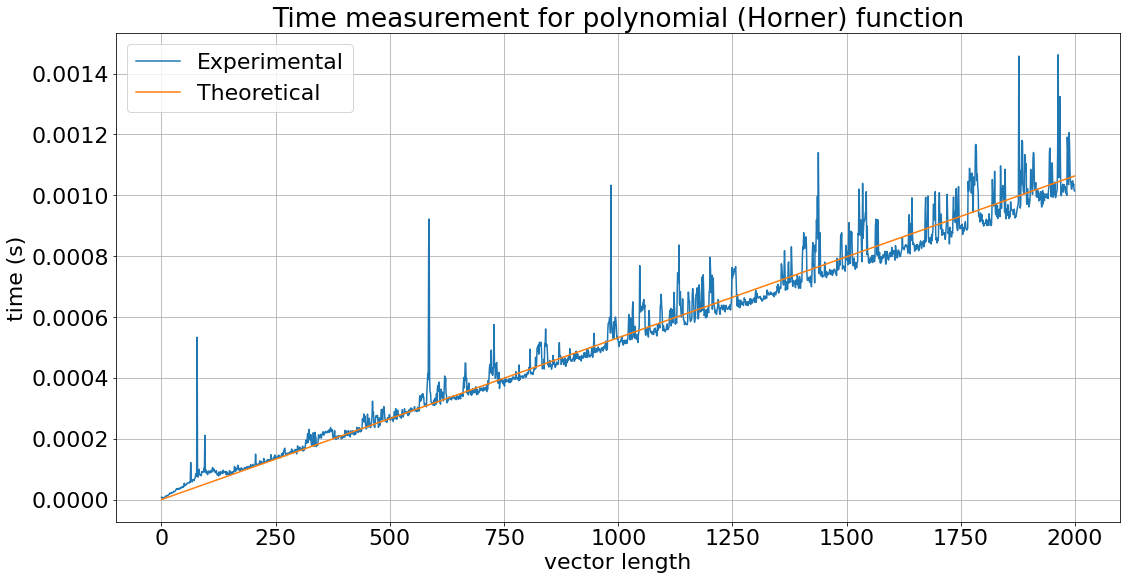

In [34]:
avg_time = measure_time(5, 2000, poly_func_horner)
plot_times(avg_time, linear_est, "polynomial (Horner) function")

100%|██████████| 2000/2000 [13:31<00:00,  2.46it/s]


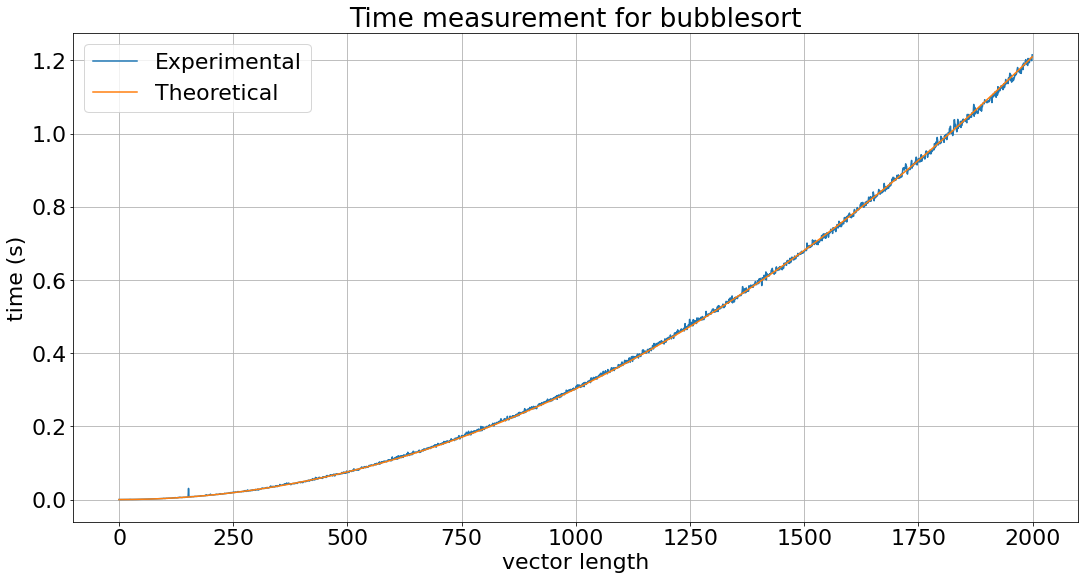

In [35]:
avg_time = measure_time(5, 2000, bubblesort)
plot_times(avg_time, quad_est, "bubblesort")

100%|██████████| 2000/2000 [00:15<00:00, 125.76it/s]


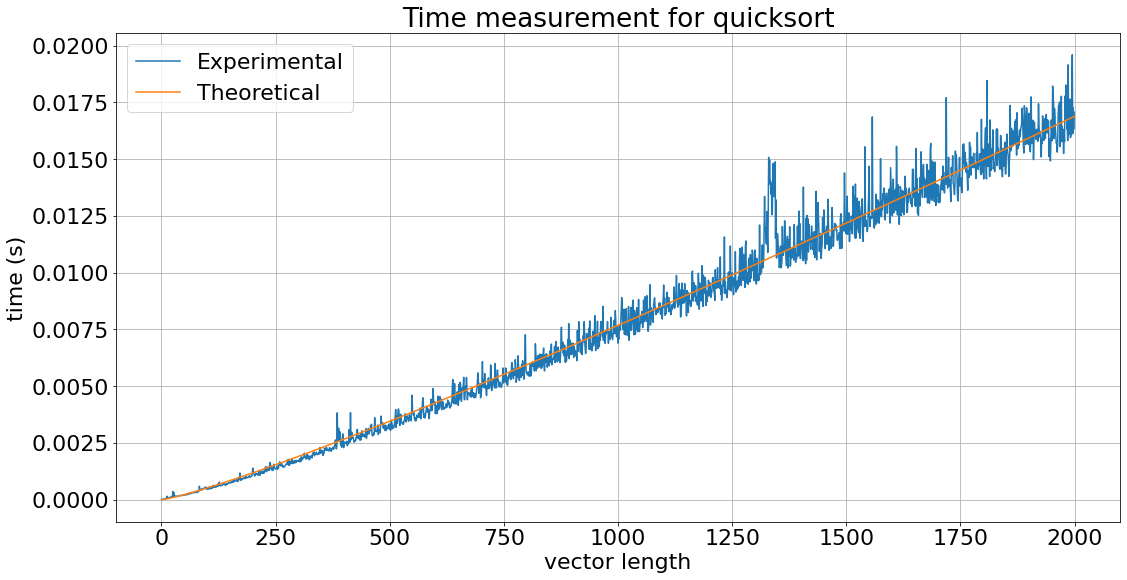

In [25]:
avg_time = measure_time(5, 2000, quicksort)
plot_times(avg_time, nlogn_est, "quicksort")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

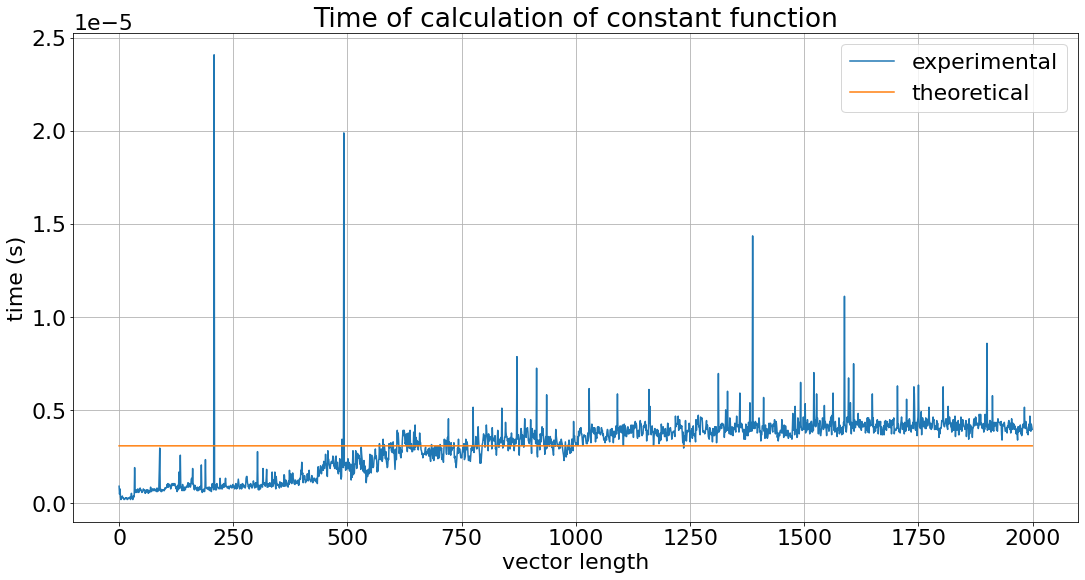

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#constant
v = 0
x = []
y = []
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y_theory = []

def cf(v):
    return 1

for i in range(2000):
    x.append(i)
print(x)

def gen(y_exp):
    y_exp = []
    for n in range(2000):
        v = np.random.rand(1, 1000, n)
        start_time = time.time()
        S = cf(v)
        y_exp.append(time.time() - start_time)
    return y_exp

y1 = gen(y1)
y2 = gen(y2)
y3 = gen(y3)
y4 = gen(y4)
y5 = gen(y5)

y = (np.array(y1) + np.array(y2) + np.array(y3) + np.array(y4) + np.array(y5)) / 5
print(y)

for n in range(2000):
    y_theory.append(np.mean(y))

plt.figure(figsize=(18, 9))
plt.plot(x, y, label='experimental')
plt.plot(x, y_theory, label='theoretical')
plt.title("Time of calculation of constant function")
plt.ylabel("time (s)")
plt.xlabel("vector length")
plt.legend()
plt.grid(True)
plt.savefig('const.png')
plt.show()
files.download("const.png")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

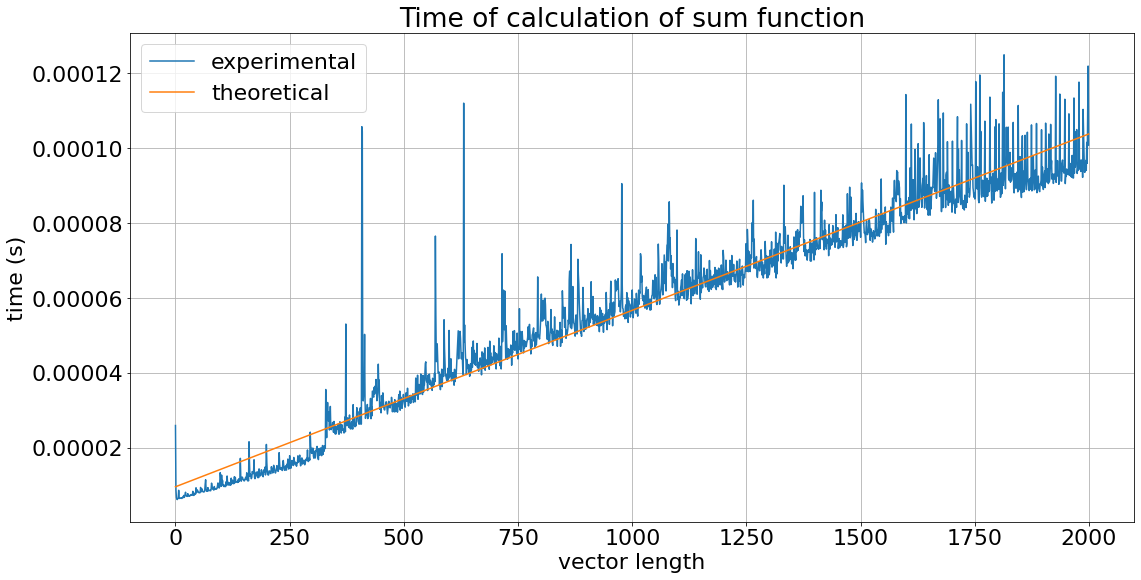

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#sum
v = 0
x = []
y = []
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []

for i in range(2000):
    x.append(i)
print(x)

def gen(y_exp):
    y_exp = []
    for n in range(2000):
        v = np.random.rand(1, 1000, n)
        start_time = time.time()
        S = np.sum(v)
        y_exp.append(time.time() - start_time)
    return y_exp

y1 = gen(y1)
y2 = gen(y2)
y3 = gen(y3)
y4 = gen(y4)
y5 = gen(y5)


y = (np.array(y1) + np.array(y2) + np.array(y3) + np.array(y4) + np.array(y5)) / 5
print(y)

c = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(c)

plt.figure(figsize=(18, 9))
plt.plot(x, y, label='experimental')
plt.plot(x, poly1d_fn(x), label='theoretical')
plt.title("Time of calculation of sum function")
plt.ylabel("time (s)")
plt.xlabel("vector length")
plt.legend()
plt.grid(True)
plt.savefig('sum.png')
plt.show()
files.download("sum.png")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

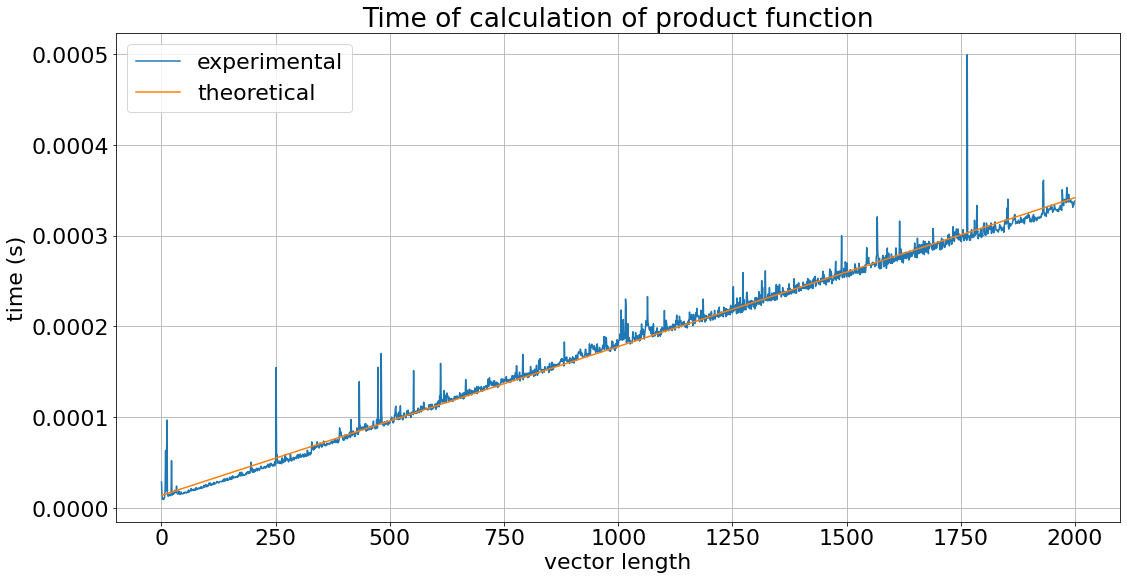

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#product
v = 0
x = []
y = []
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y_theory = []

for i in range(2000):
    x.append(i)
print(x)

def gen(y_exp):
    y_exp = []
    for n in range(2000):
        v = np.random.rand(1, 100, n)
        start_time = time.time()
        S = np.prod(v)
        y_exp.append(time.time() - start_time)
    return y_exp

y1 = gen(y1)
y2 = gen(y2)
y3 = gen(y3)
y4 = gen(y4)
y5 = gen(y5)

y = (np.array(y1) + np.array(y2) + np.array(y3) + np.array(y4) + np.array(y5)) / 5
print(y)

for n in range(2000):
    y_theory.append(np.mean(y))

c = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(c)

plt.figure(figsize=(18, 9))
plt.plot(x, y, label='experimental')
plt.plot(x, poly1d_fn(x), label='theoretical')
plt.title("Time of calculation of product function")
plt.ylabel("time (s)")
plt.xlabel("vector length")
plt.legend()
plt.grid(True)
plt.savefig('prod.png')
plt.show()
files.download("prod.png")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

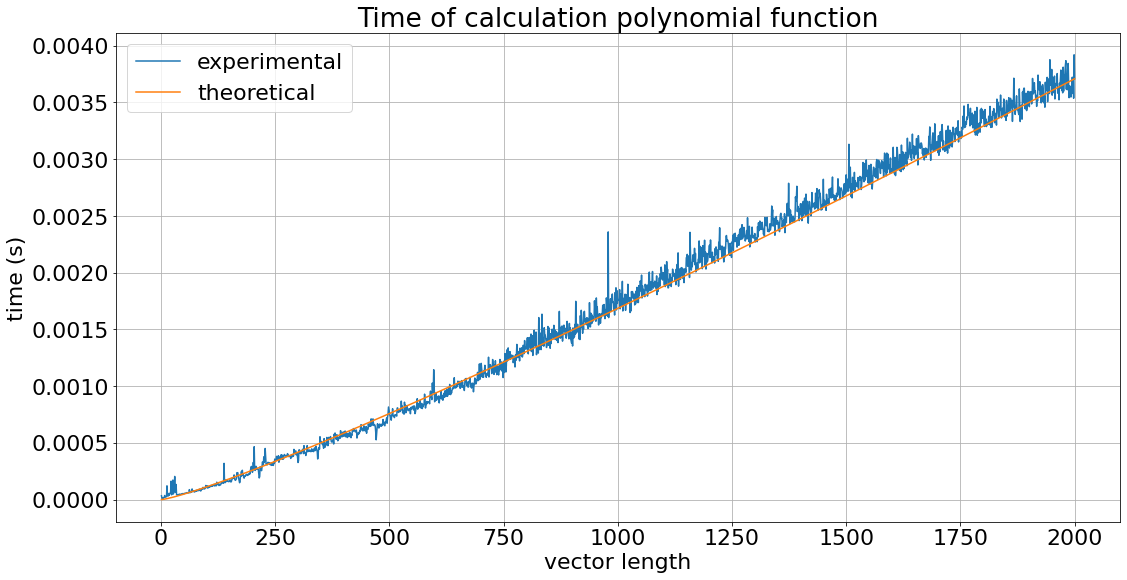

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#polynom_direct
v = 0
x = []
y = []
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y_theory = []

for i in range(1, 2001):
    x.append(i)
print(x)

def gen(y_exp):
    y_exp = []
    for n in range(1, 2001):
        v = np.random.rand(1, 1000, n)
        start_time = time.time()
        p = 1.5
        S = 0
        for i in range(len(v)):
            S = S + v[i]*(math.pow(p, i))
        y_exp.append(time.time() - start_time)
    return y_exp

y1 = gen(y1)
y2 = gen(y2)
y3 = gen(y3)
y4 = gen(y4)
y5 = gen(y5)

y = (np.array(y1) + np.array(y2) + np.array(y3) + np.array(y4) + np.array(y5)) / 5
print(y)

plt.figure(figsize=(18, 9))
plt.plot(x, y, label='experimental')
plt.plot(x, y[-1]/(x[-1]*math.log10(x[-1]))*np.multiply(x, np.log10(x)), label='theoretical')
plt.title("Time of calculation polynomial function")
plt.ylabel("time (s)")
plt.xlabel("vector length")
plt.legend()
plt.grid(True)
plt.savefig('polynom_direct.png')
plt.show()
files.download("polynom_direct.png")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

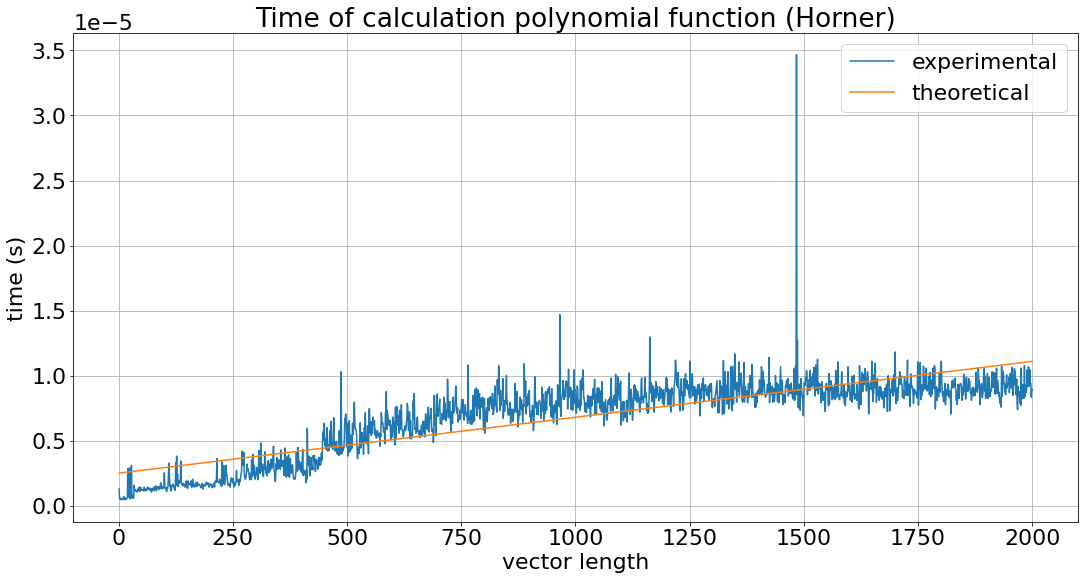

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#polynom_horner

def poly_func_horner(v, x):
    res = x
    for i in range(len(v)-1, 0, -1):
        res = res * v[i] + v[i-1]
    return res

v = 0
x = []
y = []
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y_theory = []
S = 0

for i in range(1, 2001):
    x.append(i)
print(x)

def gen(y_exp):
    y_exp = []
    for n in range(1, 2001):
        v = np.random.rand(1, 1000, n)
        start_time = time.time()
        S = 1.5
        for i in range(len(v)-1, 0, -1):
            S = S * v[i] + v[i-1]
        y_exp.append(time.time() - start_time)
    return y_exp

y1 = gen(y1)
y2 = gen(y2)
y3 = gen(y3)
y4 = gen(y4)
y5 = gen(y5)

y = (np.array(y1) + np.array(y2) + np.array(y3) + np.array(y4) + np.array(y5)) / 5
print(y)

for n in range(2000):
    y_theory.append(np.mean(y))

c = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(c)

plt.figure(figsize=(18, 9))
plt.plot(x, y, label='experimental')
plt.plot(x, poly1d_fn(x), label='theoretical')
plt.title("Time of calculation polynomial function (Horner)")
plt.ylabel("time (s)")
plt.xlabel("vector length")
plt.legend()
plt.grid(True)
plt.savefig('polynom_horner.png')
plt.show()
files.download("polynom_horner.png")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

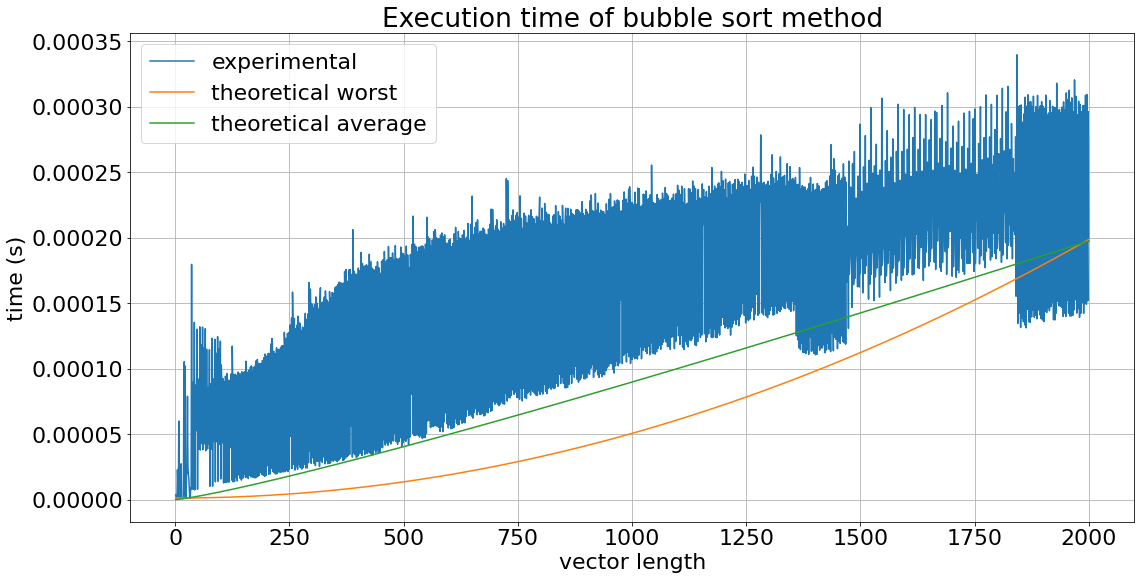

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
#bubblesort
v = 0
x = []
y = []
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y_theory1 = []
S = 0

for i in range(1, 2001):
    x.append(i)
print(x)

def gen(y_exp):
    y_exp = []
    for n in range(1, 2001):
        v = np.random.rand(1, 1000, n)
        start_time = time.time()
        S = bubblesort(v)
        y_exp.append(time.time() - start_time)
    return y_exp

y1 = gen(y1)
y2 = gen(y2)
y3 = gen(y3)
y4 = gen(y4)
y5 = gen(y5)

y = (np.array(y1) + np.array(y2) + np.array(y3) + np.array(y4) + np.array(y5)) / 5
print(y)

plt.figure(figsize=(18, 9))
plt.plot(x, y, label='experimental')
plt.plot(x, y[-1]/(math.pow(x[-1],2))*np.power(x, 2) + y[1]/2, label='theoretical worst')
plt.plot(x, y[-1]/(x[-1]*math.log10(x[-1]))*np.multiply(x, np.log10(x)), label='theoretical average')
plt.title("Execution time of bubble sort method")
plt.ylabel("time (s)")
plt.xlabel("vector length")
plt.legend()
plt.grid(True)
plt.savefig('bubblesort.png')
plt.show()
files.download("bubblesort.png")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

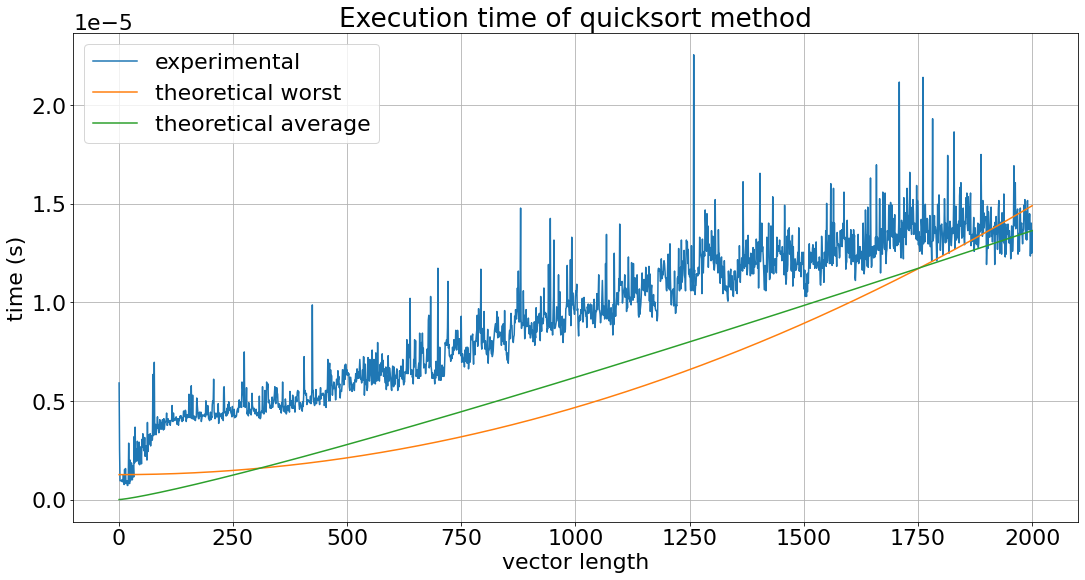

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
#quick sort
v = 0
x = []
y = []
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y_theory = []
S = 0

for i in range(1, 2001):
    x.append(i)
print(x)

def gen(y_exp):
    y_exp = []
    for n in range(1, 2001):
        v = np.random.rand(1, 1000, n)
        start_time = time.time()
        quicksort(v)
        y_exp.append(time.time() - start_time)
    return y_exp

y1 = gen(y1)
y2 = gen(y2)
y3 = gen(y3)
y4 = gen(y4)
y5 = gen(y5)

y = (np.array(y1) + np.array(y2) + np.array(y3) + np.array(y4) + np.array(y5)) / 5
print(y)

for n in range(2000):
    y_theory.append(np.mean(y))

c = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(c)

plt.figure(figsize=(18, 9))
plt.plot(x, y, label='experimental')
plt.plot(x, y[-1]/(math.pow(x[-1],2))*np.power(x, 2) + y[1]/2, label='theoretical worst')
plt.plot(x, y[-1]/(x[-1]*math.log10(x[-1]))*np.multiply(x, np.log10(x)), label='theoretical average')
plt.title("Execution time of quicksort method")
plt.ylabel("time (s)")
plt.xlabel("vector length")
plt.legend()
plt.grid(True)
plt.savefig('quicksort.png')
plt.show()
files.download("quicksort.png")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

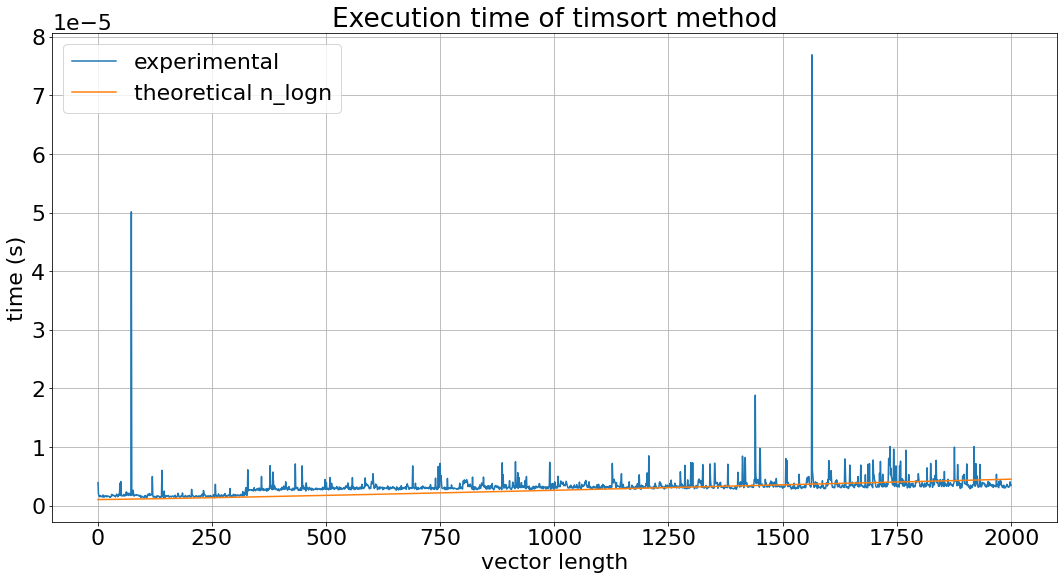

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#timsort
v = 0
x = []
y = []
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y_theory = []
S = 0

for i in range(1, 2001):
    x.append(i)
print(x)

def gen(y_exp):
    y_exp = []
    for n in range(1, 2001):
        v = np.random.rand(1, 100, n)
        start_time = time.time()
        timsort(v)
        y_exp.append(time.time() - start_time)
    return y_exp

y1 = gen(y1)
y2 = gen(y2)
y3 = gen(y3)
y4 = gen(y4)
y5 = gen(y5)

y = (np.array(y1) + np.array(y2) + np.array(y3) + np.array(y4) + np.array(y5)) / 5
print(y)

plt.figure(figsize=(18, 9))
plt.plot(x, y, label='experimental')
plt.plot(x, y[-1]/(x[-1]*math.log10(x[-1]))*np.multiply(x, np.log10(x)) + y[1]/2, label='theoretical n_logn')

plt.title("Execution time of timsort method")
plt.ylabel("time (s)")
plt.xlabel("vector length")
plt.legend()
plt.grid(True)
plt.savefig('timsort.png')
plt.show()
files.download("timsort.png")

In [ ]:
#matrix_multiplication
v = 0
x = []
y = []
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y_theory = []
S = 0

for i in range(1,251):
    x.append(i)
print(x)

def matmult(a,b):
    zip_b = zip(*b)
    zip_b = list(zip_b)
    return [[sum(ele_a*ele_b for ele_a, ele_b in zip(row_a, col_b))
             for col_b in zip_b] for row_a in a]

def gen(y_exp):
    y_exp = []
    for i in range(1, 251):
        matrix_a = np.random.rand(i, i)
        matrix_b = np.random.rand(i, i)
        start_time = time.time()
        matmult(matrix_a, matrix_b)
        y_exp.append(time.time() - start_time)
    return y_exp

y1 = gen(y1)
y2 = gen(y2)
y3 = gen(y3)
y4 = gen(y4)
y5 = gen(y5)

y = (np.array(y1) + np.array(y2) + np.array(y3) + np.array(y4) + np.array(y5)) / 5
print(y)

plt.figure(figsize=(18, 9))
plt.plot(x, y, label='experimental')
plt.plot(x, y[-1]/(math.pow(x[-1],3))*np.power(x, 3), label='theoretical')
plt.title("Time of matrix multiplication")
plt.ylabel("time (s)")
plt.xlabel("vector length")
plt.legend()
plt.grid(True)
plt.savefig('matrix_multiplication.png')
plt.show()
files.download("matrix_multiplication.png")